In [ ]:
import pandas as pd
import numpy as np
import librosa
import os
import json
import soundfile as sf
from sklearn.decomposition import PCA
from sklearn.manifold  import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
filelist=pd.DataFrame(librosa.util.find_files("/idiap/temp/ibmahmoud/evolang/animal_data/Meerkat_sound_files_examples_segments_/", ext=['wav']),columns=['path'])
filelist['class_name']= filelist.path.apply(lambda x: x.split('/')[-3])
with open('/idiap/temp/ibmahmoud/evolang/evolang_meerkats_calls_classification/workspace/src/data/class_to_index.json') as f:

    class_to_index=json.load(f)
filelist['class_index']=filelist.class_name.apply(lambda x: class_to_index[x])
duration=[]
duration_=[]
#filelist.to_csv("/idiap/temp/ibmahmoud/evolang/animal_data/Meerkat_sound_files_examples_segments/concat_path_class.csv",index=False)

paths=filelist["path"].tolist()
for i in range(len(filelist)):
    signal,f=sf.read(paths[i])
    duration.append(len(signal)/f)
filelist["duration"]=duration
for i in range(9):
    df=filelist[(filelist['class_index']==i)]
    duration_.append(sum(df["duration"].to_list()))

      classes  duration
0       alarm  0.424922
1     sunning  0.120855
2    grooming  0.007180
3     chatter  0.038640
4  submission  0.036768
5        lead  0.029860
6    foraging  0.059664
7    sentinel  0.162571
8  aggression  0.119538


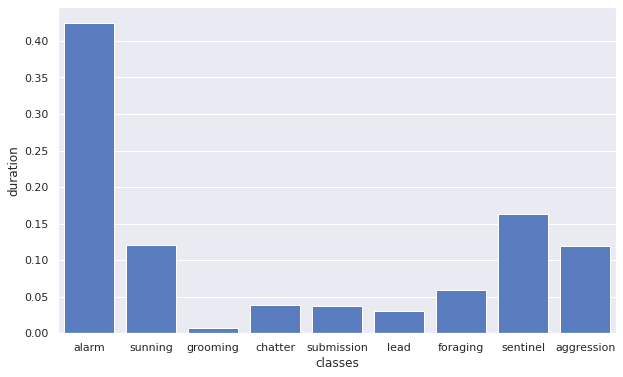

In [36]:
classes=["alarm","sunning","grooming","chatter","submission","lead","foraging","sentinel","aggression"]
myint=sum(duration_)
duration_[:] = [x /myint  for x in duration_]
d={"classes": classes ,"duration": duration_}
df=pd.DataFrame(data=d)
print(df)
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.set_color_codes("muted")
sns.barplot(x="classes",y="duration",data=df,color="b",capsize=0.7)
plt.show()


In [ ]:
filelist=pd.DataFrame(librosa.util.find_files("/idiap/resource/database/Mescalina_Bark/base_de_datos_ladridos_2017/clasificados_corregida_2017/", ext=['wav']),columns=['path'])
filelist['class_name']= filelist.path.apply(lambda x: x.split('/')[-2])
with open('/idiap/temp/ibmahmoud/evolang/evolang_meerkats_calls_classification/workspace/src/data/class_to_index_UT3.json') as f:

    class_to_index=json.load(f)
filelist['class_index']=filelist.class_name.apply(lambda x: class_to_index[x])
filelist= filelist.loc[filelist["class_name"] != "S"]
filelist.drop('class_name',inplace=True,axis=1)
duration=[]

#filelist.to_csv("/idiap/temp/ibmahmoud/evolang/animal_data/Meerkat_sound_files_examples_segments/concat_path_class.csv",index=False)

paths=filelist["path"].tolist()
for i in range(len(filelist)):
    signal,f=sf.read(paths[i])
    duration.append(len(signal)/f)
filelist["duration"]=duration
for i in range(14):
    df=filelist[(filelist['class_index']==i)]
    print(sum(df["duration"].to_list()))


In [ ]:
filelist = pd.DataFrame(librosa.util.find_files("/idiap/temp/ibmahmoud/evolang/animal_data/Meerkat_sound_files_examples_segments", ext=['wav']), columns=['path'])
filelist_=filelist["path"].tolist()


In [ ]:
lis=os.listdir("/idiap/temp/ibmahmoud/evolang/animal_data/calls/")
path_="/idiap/temp/ibmahmoud/evolang/animal_data/calls/"
dura=np.array([len(pd.read_csv(os.path.join(path_,i))) for i in lis])


In [ ]:
filelist_=[filelist_[i].split('/')]

In [ ]:
file="/idiap/temp/ibmahmoud/evolang/animal_data/csv_concat_meerkats441.csv"
df=pd.read_csv(file)
wavlist="/idiap/temp/ibmahmoud/evolang/Meerkat_sound_fikes_examples"

In [ ]:
print(len(df))
print()

In [ ]:
duration=np.array(df["duration"])
print(duration.sum())
for i in range(len(duration)):
    if duration[i] < 100:
        duration[i]=100

print(duration.sum())

In [ ]:
df["duration"]=duration
df.describe()
path=df["path"].tolist()
path=[path[i].split('/')[7] for i in range(len(df))]
print(path)

In [18]:
df=pd.read_csv("/idiap/temp/ibmahmoud/evolang/evolang_meerkats_calls_classification/workspace/features_extraction/last_layer_features_nonoise.csv",header=None)
target=df.iloc[:,len(df.columns)-1]
features=df.iloc[:,:len(df.columns)-1]
print(target)


0       6.0
1       0.0
2       7.0
3       0.0
4       7.0
       ... 
1790    4.0
1791    7.0
1792    1.0
1793    7.0
1794    4.0
Name: 80, Length: 1795, dtype: float64


In [31]:
pca = PCA(n_components=2)
pca_result=pca.fit_transform(df.iloc[:,:len(df.columns)-1])
pca_features=pd.DataFrame(data=pca_result,columns=['pca-one', 'pca-two'])
pca_features['y']=target
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.59629165 0.35508464]


/idiap/temp/ibmahmoud/miniconda3/envs/evolang/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

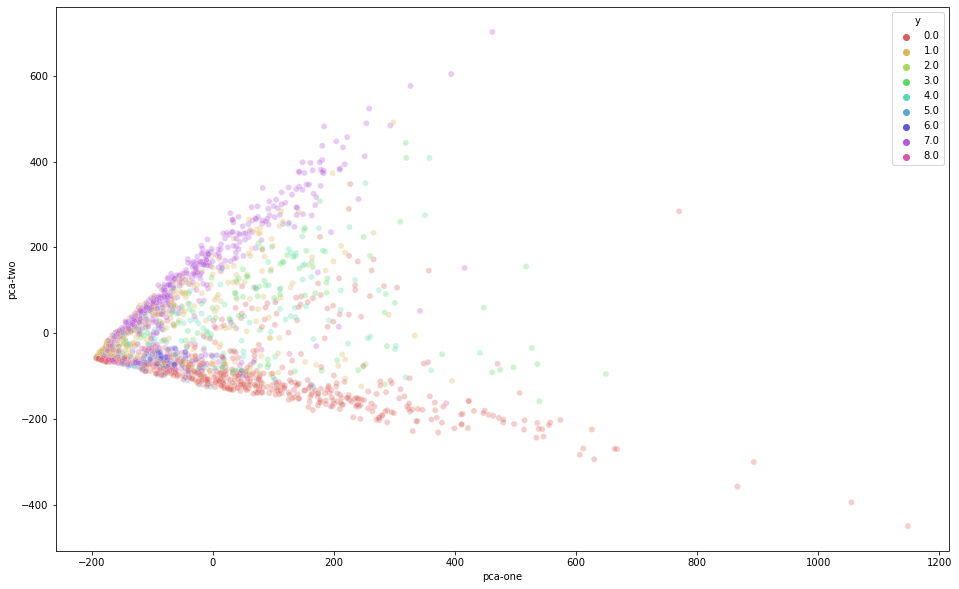

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='y',
    palette=sns.color_palette("hls", 9),
    data=pca_features,
    legend="full",
    alpha=0.3
)

In [33]:
tsne=TSNE(n_components=2)
X_embedded=tsne.fit_transform(features)

/idiap/temp/ibmahmoud/miniconda3/envs/evolang/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/idiap/temp/ibmahmoud/miniconda3/envs/evolang/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [35]:
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,1], c=target, cmap='rainbow')

ValueError: Unknown projection '2d'

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

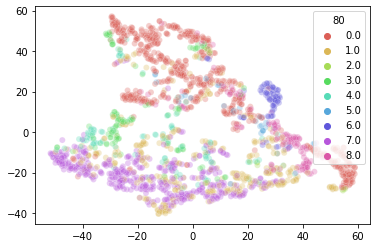

In [36]:
sns.scatterplot(
    x=X_embedded[:,0],
    y= X_embedded[:,1],
    hue=target,
    palette=sns.color_palette("hls", 9),
    #data=pca_features,
    legend="full",
    alpha=0.3
)